In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Pre-Processing

In [88]:
df = data.copy()

In [87]:
#df = df[['age','weight','height', 'ap_hi', 'cardio']]
#df = df.drop('alco',axis = 1)

# TrainTest - Nettoyage - Encodage

In [5]:
from sklearn.model_selection import train_test_split

In [89]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

In [90]:
trainset['cardio'].value_counts()

0    28033
1    27967
Name: cardio, dtype: int64

In [91]:
testset['cardio'].value_counts()

1    7012
0    6988
Name: cardio, dtype: int64

In [55]:
def encodage(df):
    df = pd.get_dummies(df, columns=['gender', 'cholesterol'], drop_first=True)
    return df

In [92]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

#### Pas besoin de traiter les valeurs NaN

In [82]:
def preprocessing(df):
    df = encodage(df)

    X = df.drop('cardio', axis = 1)
    y = df['cardio']

    print(y.value_counts())
    return X, y

In [93]:
X_train, y_train = preprocessing(trainset)

0    28033
1    27967
Name: cardio, dtype: int64


In [94]:
X_test, y_test = preprocessing(testset)

1    7012
0    6988
Name: cardio, dtype: int64


# Modelisation

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [60]:
model_1 = DecisionTreeClassifier(random_state=42)

In [85]:
model_2 = RandomForestClassifier(random_state=42)

In [75]:
model_3 = make_pipeline(SelectKBest(f_classif, k = 8), model_2)

In [98]:
model_4 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

# Evaluation

In [19]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [23]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))  

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [66]:
#evaluation(model_1)
#evaluation(model_2)

[[5054 1934]
 [2071 4941]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



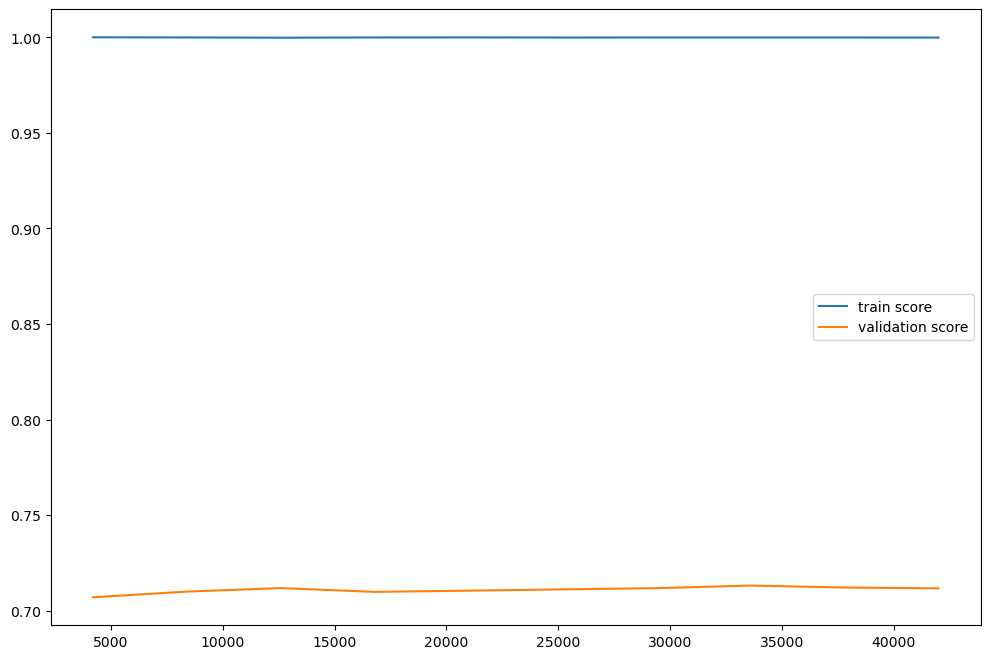

In [100]:
evaluation(model_2)

<Axes: >

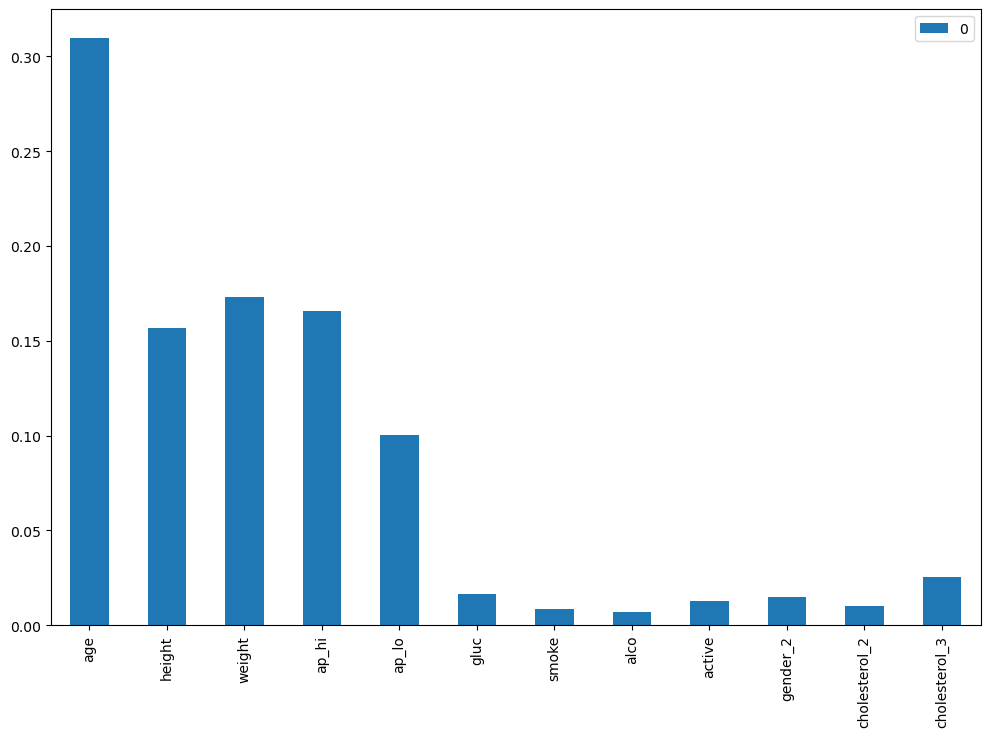

In [67]:
pd.DataFrame(model_2.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [1]:
model_2 = RandomForestClassifier(random_state=42)

NameError: name 'RandomForestClassifier' is not defined